In [1]:
#import libraries

import numpy as np
import pandas as pd
from yaml import safe_load
import os
from tqdm import tqdm
import pickle
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load file

filenames = []
for file in os.listdir('ipl'):
    filenames.append(os.path.join('ipl',file))

In [3]:
#check load flies 

filenames[0:5]

['ipl\\1082591.yaml',
 'ipl\\1082592.yaml',
 'ipl\\1082593.yaml',
 'ipl\\1082594.yaml',
 'ipl\\1082595.yaml']

In [4]:
#convert multiple file in to one dataframe

#Initialize an empty list to collect DataFrames
dataframes = []
counter = 1

#List to store corrupted files
corrupted_files = []

#Iterate over the filenames and process each file
for file in tqdm(filenames):
    try:
        with open(file, 'r') as f:
            data = safe_load(f)
            df = pd.json_normalize(data)
            df['match_id'] = counter
            dataframes.append(df)
            counter += 1
    except Exception as e:
        print(f"Error processing file {file}: {e}")
        corrupted_files.append(file)

#Print corrupted files
if corrupted_files:
    print("\nCorrupted files:")
    for corrupted_file in corrupted_files:
        print(corrupted_file)
else:
    print("No corrupted files found.")

#Concatenate all the DataFrames in the list into a single DataFrame
if dataframes:
    df = pd.concat(dataframes, ignore_index=True)    
else:
    print("No valid yaml files processed.")

100%|██████████| 1096/1096 [04:48<00:00,  3.80it/s]


Error processing file ipl\README.txt: 

Corrupted files:
ipl\README.txt


In [5]:
#check columns 

print("\n List of columns:")
print(df.columns.tolist())


 List of columns:
['innings', 'meta.data_version', 'meta.created', 'meta.revision', 'info.balls_per_over', 'info.city', 'info.competition', 'info.dates', 'info.gender', 'info.match_type', 'info.outcome.by.runs', 'info.outcome.winner', 'info.overs', 'info.player_of_match', 'info.players.Royal Challengers Bangalore', 'info.players.Sunrisers Hyderabad', 'info.registry.people.A Choudhary', 'info.registry.people.A Deshmukh', 'info.registry.people.A Nehra', 'info.registry.people.AY Dandekar', 'info.registry.people.B Kumar', 'info.registry.people.BCJ Cutting', 'info.registry.people.Bipul Sharma', 'info.registry.people.CH Gayle', 'info.registry.people.CJ Jordan', 'info.registry.people.DA Warner', 'info.registry.people.DJ Hooda', 'info.registry.people.J Srinath', 'info.registry.people.KM Jadhav', 'info.registry.people.MC Henriques', 'info.registry.people.Mandeep Singh', 'info.registry.people.N Pandit', 'info.registry.people.NJ Llong', 'info.registry.people.NV Ojha', 'info.registry.people.Rashi

In [6]:
#remove unnecessary columns 

columns_to_drop = [col for col in df.columns if 'info.registry' in col or 'info.players' in col or 'meta' in col]
df = df.drop(columns=columns_to_drop)
df

,innings,info.balls_per_over,info.city,info.competition,info.dates,info.gender,info.match_type,info.outcome.by.runs,info.outcome.winner,info.overs,...,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.outcome.by.wickets,info.outcome.eliminator,info.outcome.result,info.outcome.method,info.neutral_venue
0,[{'1st innings': {'team': 'Sunrisers Hyderabad...,6,Hyderabad,IPL,[2017-04-05],male,T20,35.0,Sunrisers Hyderabad,20,...,field,Royal Challengers Bangalore,"[AY Dandekar, NJ Llong]","Rajiv Gandhi International Stadium, Uppal",1,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Mumbai Indians', 'd...",6,Pune,IPL,[2017-04-06],male,T20,NaN,Rising Pune Supergiant,20,...,field,Rising Pune Supergiant,"[A Nand Kishore, S Ravi]",Maharashtra Cricket Association Stadium,2,7.0,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Gujarat Lions', 'de...",6,Rajkot,IPL,[2017-04-07],male,T20,NaN,Kolkata Knight Riders,20,...,field,Kolkata Knight Riders,"[Nitin Menon, CK Nandan]",Saurashtra Cricket Association Stadium,3,10.0,NaN,NaN,NaN,NaN
3,[{'1st innings': {'team': 'Rising Pune Supergi...,6,Indore,IPL,[2017-04-08],male,T20,NaN,Kings XI Punjab,20,...,field,Kings XI Punjab,"[AK Chaudhary, C Shamshuddin]",Holkar Cricket Stadium,4,6.0,NaN,NaN,NaN,NaN
4,[{'1st innings': {'team': 'Royal Challengers B...,6,Bengaluru,IPL,[2017-04-08],male,T20,15.0,Royal Challengers Bangalore,20,...,bat,Royal Challengers Bangalore,"[S Ravi, VK Sharma]",M.Chinnaswamy Stadium,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,"[{'1st innings': {'team': 'Delhi Daredevils', ...",6,Raipur,IPL,[2016-05-22],male,T20,NaN,Royal Challengers Bangalore,20,...,field,Royal Challengers Bangalore,"[A Nand Kishore, BNJ Oxenford]",Shaheed Veer Narayan Singh International Stadium,1091,6.0,NaN,NaN,NaN,NaN
1091,"[{'1st innings': {'team': 'Gujarat Lions', 'de...",6,Bangalore,IPL,[2016-05-24],male,T20,NaN,Royal Challengers Bangalore,20,...,field,Royal Challengers Bangalore,"[AK Chaudhary, HDPK Dharmasena]",M Chinnaswamy Stadium,1092,4.0,NaN,NaN,NaN,NaN
1092,[{'1st innings': {'team': 'Sunrisers Hyderabad...,6,Delhi,IPL,[2016-05-25],male,T20,22.0,Sunrisers Hyderabad,20,...,field,Kolkata Knight Riders,"[M Erasmus, C Shamshuddin]",Feroz Shah Kotla,1093,NaN,NaN,NaN,NaN,NaN
1093,"[{'1st innings': {'team': 'Gujarat Lions', 'de...",6,Delhi,IPL,[2016-05-27],male,T20,NaN,Sunrisers Hyderabad,20,...,field,Sunrisers Hyderabad,"[M Erasmus, CK Nandan]",Feroz Shah Kotla,1094,4.0,NaN,NaN,NaN,NaN


In [7]:
#convert ball-by-ball data


df1 = pd.DataFrame(columns=[
    'match_id', 'teams', 'batting_team', 'bowling_team', 'ball', 'batsman', 'bowler', 'runs', 'player_dismissed',
    'city', 'venue', 'innings', 'outcome_by_runs', 'outcome_winner', 'outcome_by_wickets', 'outcome_result'
])

count = 1
for index, row in df.iterrows():
    if count in [75, 108, 150, 180, 268, 360, 443, 458, 584, 748, 982, 1052, 1111, 1226, 1345]:
        count += 1
        continue
    
    teams = row['info.teams']
    city = row['info.city']
    venue = row['info.venue']
    outcome_by_runs = row['info.outcome.by.runs']
    outcome_winner = row['info.outcome.winner']
    outcome_by_wickets = row['info.outcome.by.wickets']
    outcome_result = row['info.outcome.result']
       
    for innings_num, innings_name in enumerate(['1st innings', '2nd innings'], 1):
        try:
            innings_data = row['innings'][innings_num - 1][innings_name]
        except (IndexError, KeyError):
             continue
        ball_of_match = []
        batsman = []
        bowler = []
        runs = []
        player_dismissed = []
        batting_team = []
        bowling_team = []
        match_id = []
        innings = []
        
        for ball in innings_data['deliveries']:
            for key in ball.keys():
                match_id.append(count)
                current_batting_team = innings_data['team']
                batting_team.append(current_batting_team)
                # Determine bowling team
                current_bowling_team = [team for team in teams if team != current_batting_team][0]
                bowling_team.append(current_bowling_team)
                ball_of_match.append(key)
                batsman.append(ball[key]['batsman'])
                bowler.append(ball[key]['bowler'])
                runs.append(ball[key]['runs']['total'])
                innings.append(innings_name)
                
                try:
                    player_dismissed.append(ball[key]['wicket']['player_out'])
                except KeyError:
                    player_dismissed.append('0')
        
        loop_df = pd.DataFrame({
            'match_id': match_id,
            'teams': [teams] * len(match_id),
            'batting_team': batting_team,
            'bowling_team': bowling_team,
            'ball': ball_of_match,
            'batsman': batsman,
            'bowler': bowler,
            'runs': runs,
            'player_dismissed': player_dismissed,
            'city': [city] * len(match_id),
            'venue': [venue] * len(match_id),
            'innings': innings,
            'outcome_by_runs': [outcome_by_runs] * len(match_id),
            'outcome_winner': [outcome_winner] * len(match_id),
            'outcome_by_wickets': [outcome_by_wickets] * len(match_id),
            'outcome_result': [outcome_result] * len(match_id)            
        })
        
        
        df1 = pd.concat([df1, loop_df], ignore_index=True)
    
    count += 1

In [8]:
#after simply data dataframe 

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257825 entries, 0 to 257824
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   match_id            257825 non-null  object 
 1   teams               257825 non-null  object 
 2   batting_team        257825 non-null  object 
 3   bowling_team        257825 non-null  object 
 4   ball                257825 non-null  float64
 5   batsman             257825 non-null  object 
 6   bowler              257825 non-null  object 
 7   runs                257825 non-null  object 
 8   player_dismissed    257825 non-null  object 
 9   city                245470 non-null  object 
 10  venue               257825 non-null  object 
 11  innings             257825 non-null  object 
 12  outcome_by_runs     120006 non-null  float64
 13  outcome_winner      253862 non-null  object 
 14  outcome_by_wickets  133856 non-null  float64
 15  outcome_result      3963 non-null 

In [9]:
#check teams name

df1['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals',
       'Punjab Kings', 'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [10]:
#convert team name according to their updated names

team_name_replacements = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'
}

for old, new in team_name_replacements.items():
    df1['batting_team'] = df1['batting_team'].str.replace(old, new)
    df1['bowling_team'] = df1['bowling_team'].str.replace(old, new)
    df1['outcome_winner'] = df1['outcome_winner'].str.replace(old, new)


In [11]:
#delete teams which is playing 2 or less than that playing season 

teams_to_keep = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bengaluru',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Lucknow Super Giants',
    'Gujarat Titans',
    'Delhi Capitals'
]

df1 = df1[
    df1['batting_team'].isin(teams_to_keep) &  df1['bowling_team'].isin(teams_to_keep)
]

df1 = df1.reset_index(drop=True)
df1

,match_id,teams,batting_team,bowling_team,ball,batsman,bowler,runs,player_dismissed,city,venue,innings,outcome_by_runs,outcome_winner,outcome_by_wickets,outcome_result
0,1,"[Sunrisers Hyderabad, Royal Challengers Bangal...",Sunrisers Hyderabad,Royal Challengers Bengaluru,0.1,DA Warner,TS Mills,0,0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1st innings,35.0,Sunrisers Hyderabad,NaN,NaN
1,1,"[Sunrisers Hyderabad, Royal Challengers Bangal...",Sunrisers Hyderabad,Royal Challengers Bengaluru,0.2,DA Warner,TS Mills,0,0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1st innings,35.0,Sunrisers Hyderabad,NaN,NaN
2,1,"[Sunrisers Hyderabad, Royal Challengers Bangal...",Sunrisers Hyderabad,Royal Challengers Bengaluru,0.3,DA Warner,TS Mills,4,0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1st innings,35.0,Sunrisers Hyderabad,NaN,NaN
3,1,"[Sunrisers Hyderabad, Royal Challengers Bangal...",Sunrisers Hyderabad,Royal Challengers Bengaluru,0.4,DA Warner,TS Mills,0,0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1st innings,35.0,Sunrisers Hyderabad,NaN,NaN
4,1,"[Sunrisers Hyderabad, Royal Challengers Bangal...",Sunrisers Hyderabad,Royal Challengers Bengaluru,0.5,DA Warner,TS Mills,2,0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1st innings,35.0,Sunrisers Hyderabad,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230814,1095,"[Royal Challengers Bangalore, Sunrisers Hydera...",Royal Challengers Bengaluru,Sunrisers Hyderabad,19.2,Sachin Baby,B Kumar,2,0,Bangalore,M Chinnaswamy Stadium,2nd innings,8.0,Sunrisers Hyderabad,NaN,NaN
230815,1095,"[Royal Challengers Bangalore, Sunrisers Hydera...",Royal Challengers Bengaluru,Sunrisers Hyderabad,19.3,Sachin Baby,B Kumar,0,CJ Jordan,Bangalore,M Chinnaswamy Stadium,2nd innings,8.0,Sunrisers Hyderabad,NaN,NaN
230816,1095,"[Royal Challengers Bangalore, Sunrisers Hydera...",Royal Challengers Bengaluru,Sunrisers Hyderabad,19.4,Iqbal Abdulla,B Kumar,1,0,Bangalore,M Chinnaswamy Stadium,2nd innings,8.0,Sunrisers Hyderabad,NaN,NaN
230817,1095,"[Royal Challengers Bangalore, Sunrisers Hydera...",Royal Challengers Bengaluru,Sunrisers Hyderabad,19.5,Sachin Baby,B Kumar,1,0,Bangalore,M Chinnaswamy Stadium,2nd innings,8.0,Sunrisers Hyderabad,NaN,NaN


In [12]:
#check how many games played on which cities  

df1['city'].value_counts()

city
Mumbai            37641
Kolkata           20278
Chennai           19455
Delhi             18998
Hyderabad         16723
Chandigarh        12811
Bangalore         12752
Jaipur            12577
Abu Dhabi          8536
Ahmedabad          8311
Bengaluru          6669
Pune               5563
Durban             3397
Dubai              3149
Dharamsala         3141
Lucknow            3036
Centurion          2866
Visakhapatnam      2850
Sharjah            2355
Navi Mumbai        2188
Johannesburg       1940
Port Elizabeth     1677
Cape Town          1528
Cuttack            1449
Ranchi             1427
Indore             1310
Mohali             1235
Raipur             1180
Nagpur              742
Guwahati            739
Kimberley           726
East London         715
Bloemfontein        500
Name: count, dtype: int64

In [13]:
#remove city where played less than 8 matches

eligible_cities = df1['city'].value_counts()[df1['city'].value_counts() > 2000].index.tolist()
df1 = df1[df1['city'].isin(eligible_cities)]
df1

,match_id,teams,batting_team,bowling_team,ball,batsman,bowler,runs,player_dismissed,city,venue,innings,outcome_by_runs,outcome_winner,outcome_by_wickets,outcome_result
0,1,"[Sunrisers Hyderabad, Royal Challengers Bangal...",Sunrisers Hyderabad,Royal Challengers Bengaluru,0.1,DA Warner,TS Mills,0,0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1st innings,35.0,Sunrisers Hyderabad,NaN,NaN
1,1,"[Sunrisers Hyderabad, Royal Challengers Bangal...",Sunrisers Hyderabad,Royal Challengers Bengaluru,0.2,DA Warner,TS Mills,0,0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1st innings,35.0,Sunrisers Hyderabad,NaN,NaN
2,1,"[Sunrisers Hyderabad, Royal Challengers Bangal...",Sunrisers Hyderabad,Royal Challengers Bengaluru,0.3,DA Warner,TS Mills,4,0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1st innings,35.0,Sunrisers Hyderabad,NaN,NaN
3,1,"[Sunrisers Hyderabad, Royal Challengers Bangal...",Sunrisers Hyderabad,Royal Challengers Bengaluru,0.4,DA Warner,TS Mills,0,0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1st innings,35.0,Sunrisers Hyderabad,NaN,NaN
4,1,"[Sunrisers Hyderabad, Royal Challengers Bangal...",Sunrisers Hyderabad,Royal Challengers Bengaluru,0.5,DA Warner,TS Mills,2,0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1st innings,35.0,Sunrisers Hyderabad,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230814,1095,"[Royal Challengers Bangalore, Sunrisers Hydera...",Royal Challengers Bengaluru,Sunrisers Hyderabad,19.2,Sachin Baby,B Kumar,2,0,Bangalore,M Chinnaswamy Stadium,2nd innings,8.0,Sunrisers Hyderabad,NaN,NaN
230815,1095,"[Royal Challengers Bangalore, Sunrisers Hydera...",Royal Challengers Bengaluru,Sunrisers Hyderabad,19.3,Sachin Baby,B Kumar,0,CJ Jordan,Bangalore,M Chinnaswamy Stadium,2nd innings,8.0,Sunrisers Hyderabad,NaN,NaN
230816,1095,"[Royal Challengers Bangalore, Sunrisers Hydera...",Royal Challengers Bengaluru,Sunrisers Hyderabad,19.4,Iqbal Abdulla,B Kumar,1,0,Bangalore,M Chinnaswamy Stadium,2nd innings,8.0,Sunrisers Hyderabad,NaN,NaN
230817,1095,"[Royal Challengers Bangalore, Sunrisers Hydera...",Royal Challengers Bengaluru,Sunrisers Hyderabad,19.5,Sachin Baby,B Kumar,1,0,Bangalore,M Chinnaswamy Stadium,2nd innings,8.0,Sunrisers Hyderabad,NaN,NaN


In [14]:
#remove matches which has been draw or no results declared 

df1 = df1[~df1['outcome_result'].isin(['tie', 'no result'])]

# Reset the index of the DataFrame to ensure it is continuous
df1.reset_index(drop=True, inplace=True)


In [15]:
#add new columns call 'over' its describe which tells over ongoing 

def split_ball(ball_float):
    over = math.floor(ball_float)
    ball = round((ball_float - over) * 10)
    return over + 1, ball 


df1[['over', 'ball']] = df1['ball'].apply(split_ball).tolist()

C:\Users\Arth\AppData\Local\Temp\ipykernel_19168\4259111312.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['over', 'ball']] = df1['ball'].apply(split_ball).tolist()


In [16]:
#column is of numeric type

df1['match_id'] = pd.to_numeric(df1['match_id'], errors='coerce')
df1['runs'] = pd.to_numeric(df1['runs'], errors='coerce')
df1['over'] = pd.to_numeric(df1['over'], errors='coerce')
df1['ball'] = pd.to_numeric(df1['ball'], errors='coerce')

C:\Users\Arth\AppData\Local\Temp\ipykernel_19168\561296277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['match_id'] = pd.to_numeric(df1['match_id'], errors='coerce')
C:\Users\Arth\AppData\Local\Temp\ipykernel_19168\561296277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['runs'] = pd.to_numeric(df1['runs'], errors='coerce')
C:\Users\Arth\AppData\Local\Temp\ipykernel_19168\561296277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [17]:
#add new columns called "first innings total" which is display the first inning score of that match

first_innings_total = df1[df1['innings'] == '1st innings'].groupby('match_id')['runs'].sum().reset_index()
first_innings_total = first_innings_total.rename(columns={'runs': 'first_innings_total'})
df1 = pd.merge(df1, first_innings_total, on='match_id', how='left')

In [18]:
df1['first_innings_total'] = df1['first_innings_total'].fillna(0)
df1

,match_id,teams,batting_team,bowling_team,ball,batsman,bowler,runs,player_dismissed,city,venue,innings,outcome_by_runs,outcome_winner,outcome_by_wickets,outcome_result,over,first_innings_total
0,1,"[Sunrisers Hyderabad, Royal Challengers Bangal...",Sunrisers Hyderabad,Royal Challengers Bengaluru,1,DA Warner,TS Mills,0,0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1st innings,35.0,Sunrisers Hyderabad,NaN,NaN,1,207
1,1,"[Sunrisers Hyderabad, Royal Challengers Bangal...",Sunrisers Hyderabad,Royal Challengers Bengaluru,2,DA Warner,TS Mills,0,0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1st innings,35.0,Sunrisers Hyderabad,NaN,NaN,1,207
2,1,"[Sunrisers Hyderabad, Royal Challengers Bangal...",Sunrisers Hyderabad,Royal Challengers Bengaluru,3,DA Warner,TS Mills,4,0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1st innings,35.0,Sunrisers Hyderabad,NaN,NaN,1,207
3,1,"[Sunrisers Hyderabad, Royal Challengers Bangal...",Sunrisers Hyderabad,Royal Challengers Bengaluru,4,DA Warner,TS Mills,0,0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1st innings,35.0,Sunrisers Hyderabad,NaN,NaN,1,207
4,1,"[Sunrisers Hyderabad, Royal Challengers Bangal...",Sunrisers Hyderabad,Royal Challengers Bengaluru,5,DA Warner,TS Mills,2,0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1st innings,35.0,Sunrisers Hyderabad,NaN,NaN,1,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200640,1095,"[Royal Challengers Bangalore, Sunrisers Hydera...",Royal Challengers Bengaluru,Sunrisers Hyderabad,2,Sachin Baby,B Kumar,2,0,Bangalore,M Chinnaswamy Stadium,2nd innings,8.0,Sunrisers Hyderabad,NaN,NaN,20,208
200641,1095,"[Royal Challengers Bangalore, Sunrisers Hydera...",Royal Challengers Bengaluru,Sunrisers Hyderabad,3,Sachin Baby,B Kumar,0,CJ Jordan,Bangalore,M Chinnaswamy Stadium,2nd innings,8.0,Sunrisers Hyderabad,NaN,NaN,20,208
200642,1095,"[Royal Challengers Bangalore, Sunrisers Hydera...",Royal Challengers Bengaluru,Sunrisers Hyderabad,4,Iqbal Abdulla,B Kumar,1,0,Bangalore,M Chinnaswamy Stadium,2nd innings,8.0,Sunrisers Hyderabad,NaN,NaN,20,208
200643,1095,"[Royal Challengers Bangalore, Sunrisers Hydera...",Royal Challengers Bengaluru,Sunrisers Hyderabad,5,Sachin Baby,B Kumar,1,0,Bangalore,M Chinnaswamy Stadium,2nd innings,8.0,Sunrisers Hyderabad,NaN,NaN,20,208


In [19]:
#add new column called "balls_bowled" which is tells how many delivery is done in this game

df1['balls_bowled'] = (df1['over']*6) + df1['ball']

In [20]:
#add new column call"balls_left" which tells how many ball is left in this game

df1['balls_left'] = 126 - df1['balls_bowled']
df1['balls_left'] = df1['balls_left'].apply(lambda x:0 if x<0 else x)

## Exploratory Data Analysis (EDA)

In [21]:
#numeric columns

num_cols = df1.select_dtypes(include=['int64', 'float64'])

C:\Users\Arth\AppData\Local\Temp\ipykernel_19168\514269936.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Arth\AppData\Local\Temp\ipykernel_19168\514269936.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Arth\AppData\Local\Temp\ipykernel_19168\514269936.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Arth\AppData\Local\Temp\ipykernel_19168\514269936.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Arth\AppData\Local\Temp\ipykernel_19168\514269936.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Arth\AppData\Local\Temp\ipykernel_19168\514269936.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Arth\AppData\Local\Temp\ipykernel_19168\514269936.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Arth\AppData\Local\Temp\i

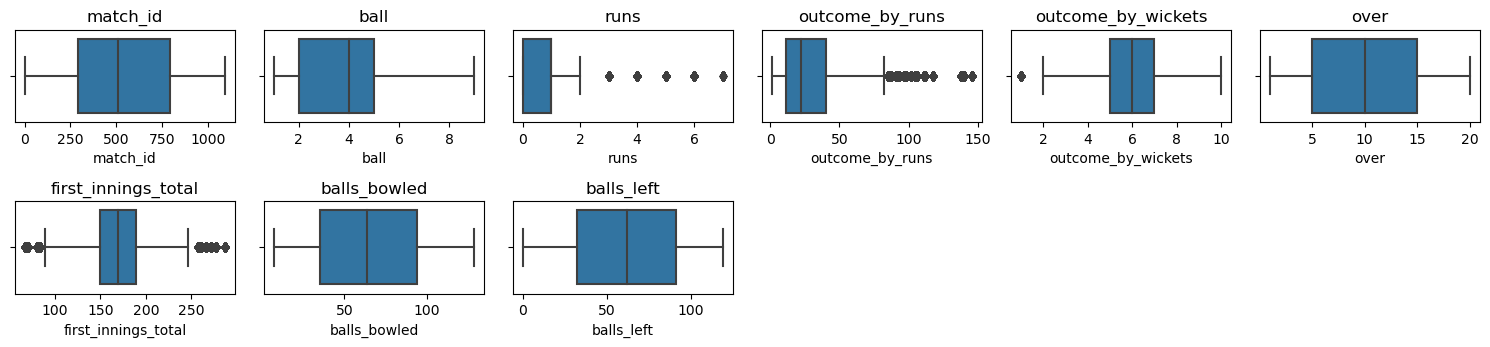

In [22]:
#data distribution

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols.columns):
    plt.subplot(6, 6, i+1)
    sns.boxplot(x=df1[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

batting_team
Lucknow Super Giants           181.461703
Gujarat Titans                 175.945766
Royal Challengers Bengaluru    171.544126
Punjab Kings                   169.976931
Mumbai Indians                 169.864249
Chennai Super Kings            169.131061
Sunrisers Hyderabad            167.462134
Delhi Capitals                 167.242984
Rajasthan Royals               166.691917
Kolkata Knight Riders          165.672363
Name: first_innings_total, dtype: float64


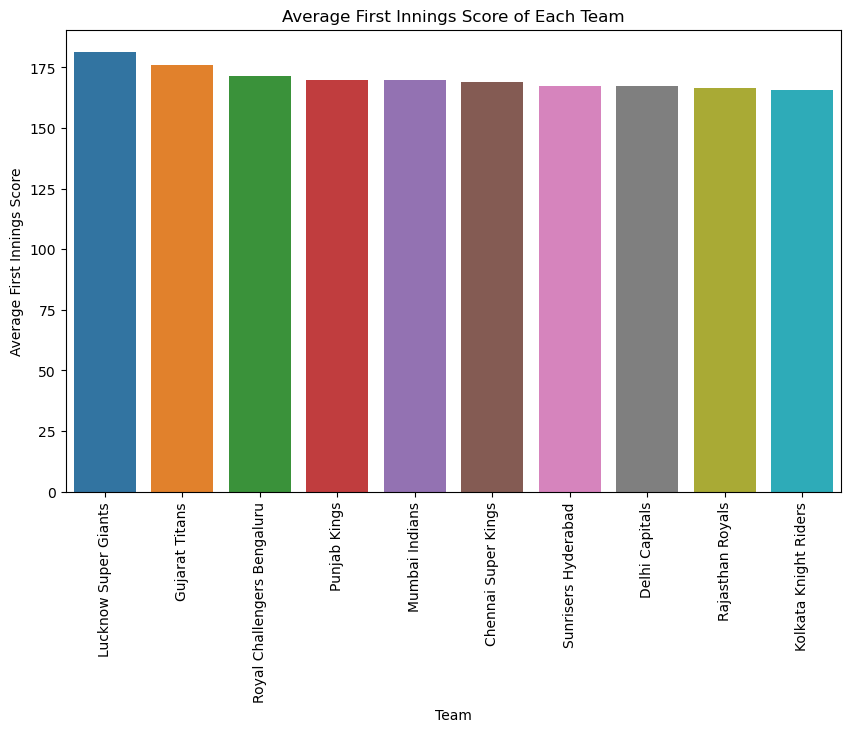

In [23]:
#Average first innings score for each team


avg_first_innings_score = df1.groupby('batting_team')['first_innings_total'].mean().sort_values(ascending=False)
print(avg_first_innings_score)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_first_innings_score.index, y=avg_first_innings_score.values)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Average First Innings Score')
plt.title('Average First Innings Score of Each Team')
plt.show()

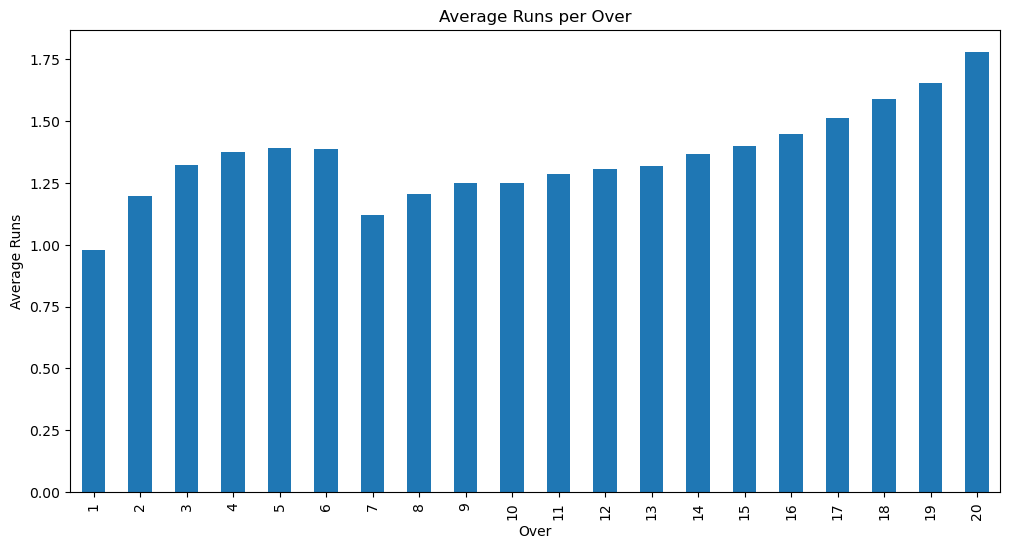

In [24]:
#Average runs per over

df1['over'] = df1['over'].astype(int)
avg_runs_per_over = df1.groupby('over')['runs'].mean()

plt.figure(figsize=(12, 6))
avg_runs_per_over.plot(kind='bar')
plt.title('Average Runs per Over')
plt.xlabel('Over')
plt.ylabel('Average Runs')
plt.show()

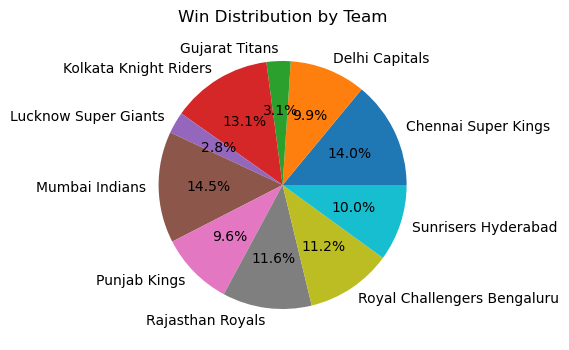

In [25]:
#Win Distribution as per team

win_counts = df1.groupby('outcome_winner').size()

plt.figure(figsize=(4, 8))
win_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Win Distribution by Team')
plt.ylabel('')
plt.show()

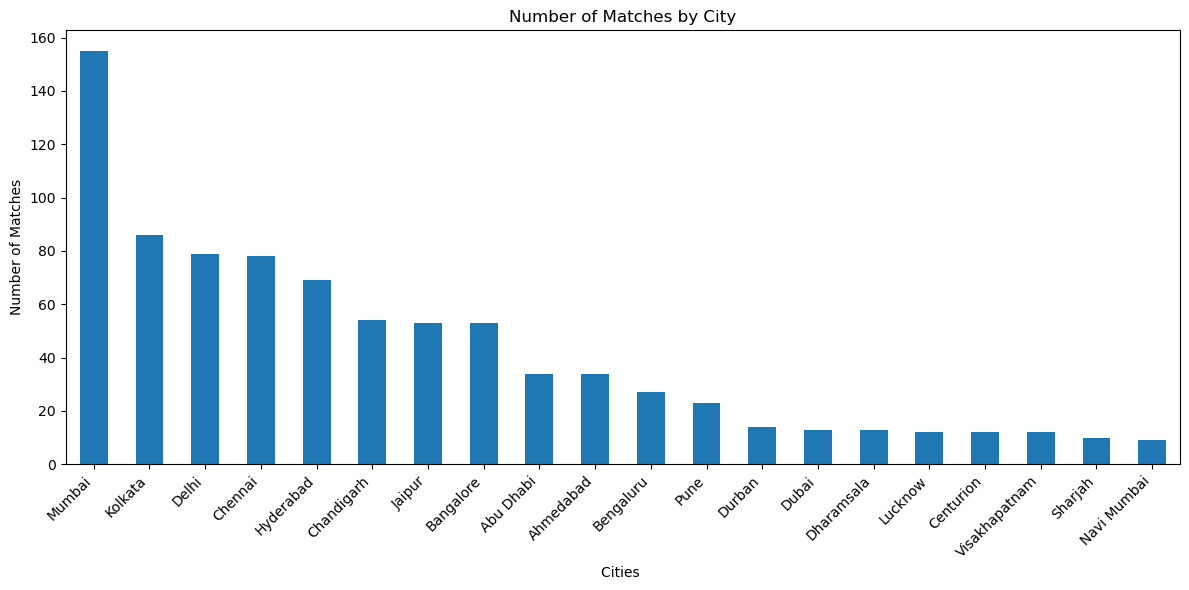

In [26]:
#Number of matches played in city

city_match_count = df1.groupby('city')['match_id'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
city_match_count.plot(kind='bar')
plt.title('Number of Matches by City')
plt.xlabel('Cities ')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

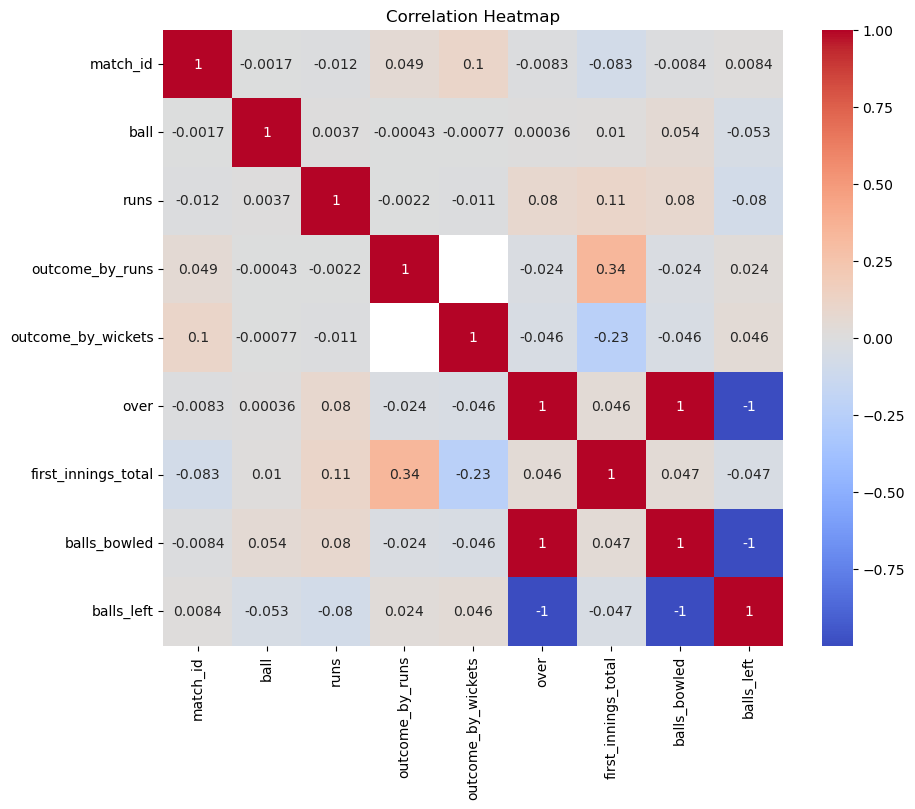

In [27]:
#Correlation Matrix

correlation_matrix = num_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

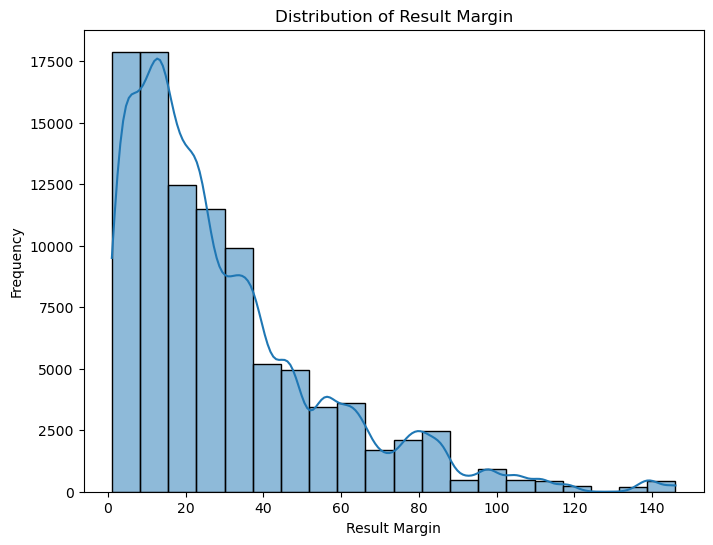

In [28]:
#Distribution of Result Margin

plt.figure(figsize=(8, 6))
sns.histplot(df1['outcome_by_runs'], bins=20, kde=True)
plt.xlabel('Result Margin')
plt.ylabel('Frequency')
plt.title('Distribution of Result Margin')
plt.show()

In [29]:
#remove unnecessary columns 

df1.drop(columns=['teams'],inplace=True)
df1.drop(columns=['batsman'],inplace=True)
df1.drop(columns=['bowler'],inplace=True)
df1.drop(columns=['venue'],inplace=True)
df1.drop(columns=['outcome_by_runs'],inplace=True)
df1.drop(columns=['outcome_by_wickets'],inplace=True)
df1.drop(columns=['outcome_result'],inplace=True)
df1

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,innings,outcome_winner,over,first_innings_total,balls_bowled,balls_left
0,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,1,0,0,Hyderabad,1st innings,Sunrisers Hyderabad,1,207,7,119
1,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,2,0,0,Hyderabad,1st innings,Sunrisers Hyderabad,1,207,8,118
2,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,3,4,0,Hyderabad,1st innings,Sunrisers Hyderabad,1,207,9,117
3,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,4,0,0,Hyderabad,1st innings,Sunrisers Hyderabad,1,207,10,116
4,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,5,2,0,Hyderabad,1st innings,Sunrisers Hyderabad,1,207,11,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200640,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,2,2,0,Bangalore,2nd innings,Sunrisers Hyderabad,20,208,122,4
200641,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,3,0,CJ Jordan,Bangalore,2nd innings,Sunrisers Hyderabad,20,208,123,3
200642,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,4,1,0,Bangalore,2nd innings,Sunrisers Hyderabad,20,208,124,2
200643,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,5,1,0,Bangalore,2nd innings,Sunrisers Hyderabad,20,208,125,1


In [30]:
# #download pickle file

# pickle.dump(df1,open('Common.pkl','wb'))